# Hospital Medical Charges - Bootstrapping

In this mini-project, I used the medical charge data to make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment). Bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what happens.

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [12]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style({'axis.grid':False})

## Medical Charge Data Set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [4]:
np.random.seed(47)
N_rep = 10000

# set up an empty array
boots_replicates = np.empty(N_rep)

# getting 10000 bootstrap replicates (10000) 
# replicates indicate the statistic value

for i in range(N_rep):
    boots_sample = np.random.choice(med_charges.charges, size=len(med_charges.charges))
    boots_replicates[i] = boots_sample.mean()

# sanity check
# len(bs_replicates) # --> should be equal to 'N_rep'


In [5]:
# estimating the same 95% confidence interval lower limit 
# since it's the lower limit, set the area under the curve as 5%
lower_limit = np.percentile(boots_replicates, [5])[0]

print("The lower limit of the 95% confidence interval is: {}".format(lower_limit))

The lower limit of the 95% confidence interval is: 12724.467921704


I performed 10000 replicates immediately after setting the random seed to 47 and got the value 12724, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval in my last medical charges project. the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Below, I calculated the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured) over 10000 replicates and plotted the histogram of values.

$Ho$: there is no difference in standard deviations between insured and non-insured groups
i.e. $μd = 0$

$Ha$: there is a difference in standard deviations between insured and non-insured groups
i.e. $μd ≠ 0$


In [6]:
# (Reference: Datacamp / Statistical Thinking in Python (Part 2) / Generating many Bootstrap Replicates)

def draw_boots_reps(data, func, size=1):
    """Draw bootstrap replicates. 
    Func refers to the type of statistic we want (np.mean / np.median etc.)"""
    
    # Initialize array of replicates: boots_replicates
    boots_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        boots_sample = np.random.choice(data, len(data))
        boots_replicates[i] = func(boots_sample)  # store the statistic from each boots_sample into the new array

    return boots_replicates

In [7]:
# Dividing dataset into two groups (insured vs. non-insured)
# Insured group and non-insured group in arrays
insured = np.array(med_charges[med_charges['insuranceclaim']==1].charges)
non_insured = np.array(med_charges[med_charges['insuranceclaim']==0].charges)

# Difference of the standard deviation of the original sample (observed)
obs_difference_std = np.std(insured) - np.std(non_insured)
obs_difference_std

7596.256408655182

In [9]:
# difference in bootstrap relicates (for N=10000)
boots_diff_std = draw_boots_reps(insured, np.std, size=10000) - draw_boots_reps(non_insured, np.std, size=10000)
    
# getting the 95% confidence interval
ci_95 = np.percentile(boots_diff_std,[2.5, 97.5])
ci_95

print("The 95% confidence interval of the difference in standard deviation between two groups is: [{} , {}]".format(ci_95[0],ci_95[1]))

The 95% confidence interval of the difference in standard deviation between two groups is: [6668.090641232525 , 8492.531852090358]


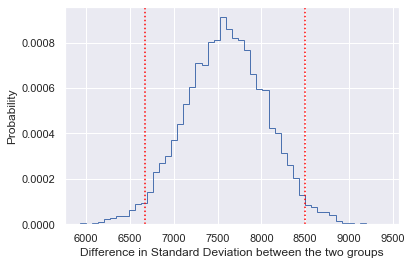

In [14]:
# plotting the histogram

plt.hist(boots_diff_std, bins=50, density=True, histtype='step')
plt.axvline(ci_95[0], color='red', linestyle=':')
plt.axvline(ci_95[1], color='red', linestyle=':')
plt.xlabel('Difference in Standard Deviation between the two groups')
plt.ylabel('Probability')
plt.show()

### Interpretation of the Result:

The Bootstrap approach indicates that the difference in standard deviations between the two groups (insured vs. non-insured) have a 95% chance of lying within **[6668.09 , 8492.53]**, which does not contain zero. Thus, we reject the null hypothesis. There is a significant difference in standard deviation (and thus variance) between the insured and non-insured groups.

## Confidence interval and p-value

Below I performed a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges using the bootstrap approach.

__A:__

For $α$ = 0.05,

$Ho$: there is no difference in charges between insured and non-insured groups
i.e. $μd$ = 0

$Ha$: there is a difference in charges between insured and non-insured groups
i.e. $μd$ ≠ 0

The test statistic is the mean and I computed the differences in means of the two groups to determine if there are any differences between the groups. To do this, I shifted the means of each group so that they have equal means.

In [15]:
# Shifting the Dataset so that the two groups have equal means

# First calculate the combined mean
combined_mean = np.mean(np.concatenate((insured, non_insured)))

# Generate the shifted dataset 
insured_shifted = insured - np.mean(insured) + combined_mean
non_insured_shifted = non_insured - np.mean(non_insured) + combined_mean

In [16]:
# Draw the bootstrap replicates from the shifted dataset
boots_replicates_insured = draw_boots_reps(insured_shifted, np.mean, size=1000)
boots_replicates_non_insured = draw_boots_reps(non_insured_shifted, np.mean, size=1000)

In [17]:
# Get the differences for the bootstrap simulated sample
boots_differences = boots_replicates_insured - boots_replicates_non_insured
# boots_differences
# len(boots_differences)  # --> should be 10000

# Get the observed difference from the actual dataset
obs_diff = np.mean(insured) - np.mean(non_insured)
obs_diff

7602.506384231372

In [18]:
# Calculate the p-value by comparing the bootstrap replicates against the observed difference of the means
# The fraction of values WITHIN bootstrap replicates array that meet a certain criteria against the obs_diff

p = np.sum(boots_differences >= obs_diff)/ len(boots_differences)
print('p-value =', p)

p-value = 0.0


**Interpretation of the Result:** <br>
Since the calculation resulted in a p-value of 0, which p-value<$α$. Thus, we can conclude that there is a statistically significant difference in charges between insured and non-insured groups and reject the null hypothesis. 

To put the above result in perspective, I plotted the histogram of the bootstrapped differences along with lines marking the locations of the observed difference: 

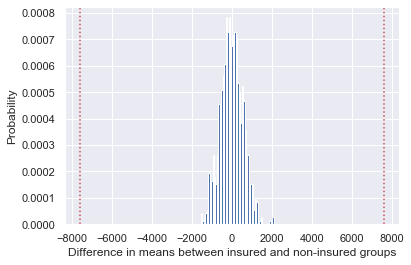

In [22]:
# Plotting in histogram
plt.hist(boots_differences, bins=50, density=True)
plt.xlabel("Difference in means between insured and non-insured groups")
plt.ylabel("Probability")
plt.axvline(obs_diff, color='r', linestyle=':')
plt.axvline(-obs_diff, color='r', linestyle=':')
plt.show()

I plotted the two lines because the observed difference could be either a negative or a positive value (depending on which value is getting subtracted from where). Also the hypothesis testing was two-tailed since the alternative hypothesis was $Ha: μd ≠ 0$

#### Extra Commentary:

There is not much difference when comparing the p-value using the bootstrap approach and the t-test. The p-value I calculated  above is 0.0 while The p-value I calculated using the t-test is 1.1105103216309438e-37, which is practically zero. There is no point in performing more bootstrap replicates since the probablity is so low already.

Considering the different t-tests (having equal vs. unequal variants) that I performed, Welch's t-test where the variances of the two groups are unequal is better to perform. 

Instead of finding out if the means of two different groups were different, but now I needed to find out which algorithim to recommend for an ad to imporve click-through rate I would perform a permutation test. This is because I can simulate the result as if the change in algorithm had no effect on the click-through rate (null hypothesis).<br>

Null hypothesis ($H0$): test statistic is not affected by the change in algorithm<br>
Alternative Hypothesis ($Ha$): test statistic is affected (for better or worse) by the change in algorithm <br>

Real World consequences of rejecting the null, will result in a type I error (incorrectly rejecting the true null hypothesis), the time and resources put into deploying the new recommendation algorithm.

Readings on Type I and Type II Error:<br>
Type I Error: incorrectly rejecting a true null hypothesis --> (false positive) <br>
Type II Error: failing to reject a false null hypothesis (accepting the null, but finding out that the null is actually false) --> (false negative)

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.